<a href="https://colab.research.google.com/github/rheaannboby/TripAdvisorReviewAnalysis/blob/main/LabelAndRatingDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARIES**

In [14]:
## All purpose
import pandas as pd 
import numpy as np

## Visualization
import seaborn as sns
import plotly
import plotly.express as px

## Creating sentimental polarity 
analyzer = SentimentIntensityAnalyzer()
def compound_score(txt):
    return analyzer.polarity_scores(txt)["compound"]

## Sentiments
def sentiment(score):
    emotion = ""
    if score >= 0.5:
        emotion = "Positive"
    else:
        emotion = "Negative"
    return emotion

def labelling(score):
    emotion = ""
    if score >= 0.5:
        emotion = 1
    else:
        emotion = 0
    return emotion

## Importing CSV file
df = pd.read_csv("ReviewsExceptLabel.csv")

## Applying Compund score
polarity_scores = df["Reviews"].astype("str").apply(compound_score)
df["Sentiment_Score"] = polarity_scores

## Applying Sentiment
df["Sentiment"] = df["Sentiment_Score"].apply(sentiment)

df["Label"] = df["Sentiment_Score"].apply(labelling)

## Saving preprocessed file 
df.to_csv("FinalReviewsDataset.csv",index=False)
df.Sentiment.value_counts()

Positive    709
Negative    171
Name: Sentiment, dtype: int64

**INSTALLING VADERSENTIMENT**

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 7.7 MB/s 


**IMPORTING THE TRIP-ADVISOR-HOTEL-REVIEW DATASET**

In [ ]:
# Importing the Final Review Dataset
data=pd.read_csv('FinalReviewsDataset.csv')

# Having a look at the data
data.head(30)

,Unnamed: 0,Reviews,Ratings,Sentiment_Score,Sentiment,Label
0,0,My Review is purely about FOOD and nothing els...,1.0,0.9700,Positive,1
1,1,"It is a great place to visit , which will not ...",5.0,0.9396,Positive,1
2,2,The prawn curry and the fish tandor was amazin...,4.0,0.8860,Positive,1
3,3,"Before i write furthermore, I would like to th...",5.0,0.9784,Positive,1
4,4,Enjoyed a dinner at the place with my Colleagu...,4.0,0.9267,Positive,1
5,5,Organised team brunch outing at Fisherman’s wh...,4.0,0.9001,Positive,1
6,6,If you are looking for a place to chill out th...,5.0,0.8625,Positive,1
7,7,We had a family lunch buffet and the spread wa...,4.0,0.8747,Positive,1
8,8,The place was nice with dim lighting and the s...,4.0,0.9013,Positive,1
9,9,We went to this place for dinner on 17/9/19. A...,1.0,0.3553,Negative,0


In [ ]:
data.isna().sum()

Unnamed: 0         0
Reviews            0
Ratings            0
Sentiment_Score    0
Sentiment          0
Label              0
dtype: int64

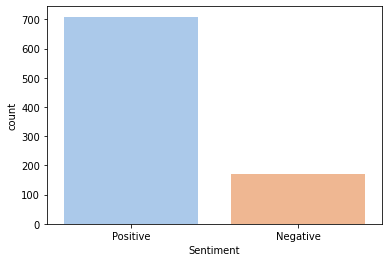

In [ ]:
sns.countplot(data=data,x="Sentiment",palette="pastel");

In [ ]:
# Preparing data for visualization 
Viz_1 = data[['Ratings','Sentiment']].value_counts().rename_axis(['Rating','Sentiment']).reset_index(name='counts')

# Plotting the Bar Graph 
fig = px.bar(x=Viz_1.Rating, y=Viz_1.counts, color=Viz_1.Sentiment,color_discrete_sequence=px.colors.qualitative.Pastel,title="Sentiment & Ratings",labels={'x':'Ratings','y':'Total Number'})
fig.show()

In [ ]:
#Viz2 Data preparation 
Viz_2 = data['Ratings'].value_counts().rename_axis(['Rating']).reset_index(name='counts')
    
# Plotting  pie chart for ratings
fig_pie = px.pie(values=Viz_2.counts, names=Viz_2.Rating, title='Rating Distribution of the data',color_discrete_sequence=px.colors.qualitative.Pastel)
fig_pie.show()